# Answering the Science Question

This notebook serves as a demo for answering the science question underlying the design of Mike's Calfornia Current regional model. You can follow and/or adapt this notebook based on your science question.

For reference, the science question for Mike's model is: **How do winds affect ocean temperature in the California Current?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = '/Users/harsita/Desktop/sjsu/year 3/spring 25/cs 185c - ocean modeling/ocean-modeling/project'

Then, re-create the model grid

In [3]:
delX = 0.25
delY = 0.25
xgOrigin = 55
ygOrigin = -20
n_rows = 280
n_cols = 160

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results with and without wind. I'll choose one field near the end of my simulation:

In [4]:
# read in the grid with the wind
grid_wind = np.fromfile(os.path.join(project_dir,'run','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000058176.data'), '>f4')
grid_wind = grid_wind.reshape((2,n_rows,n_cols))

# read in the grid without the wind
grid_no_wind = np.fromfile(os.path.join(project_dir,'run_1997','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000051840.data'), '>f4')
grid_no_wind = grid_no_wind.reshape((2,n_rows,n_cols))

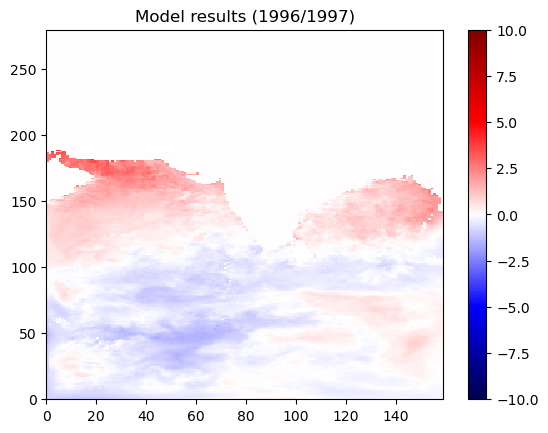

In [5]:
# plot the differences
C = plt.pcolormesh(grid_wind[0,:,:-1]-grid_no_wind[0,:,:-1],
                   cmap='seismic',vmin=-10, vmax=10)
plt.colorbar(C)
plt.title('Model results (1996/1997)')
plt.show()

Wow! The model temperature field is nearly 20 degrees hotter without the wind! This reflects the role of the wind in cooling the ocean surface. The only places that we see similar values is on the boundary of the domain. This makes sense because we are prescribing values at the boundaries of the model.

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [6]:
row = 100
col = 80

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [7]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(1996,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [9]:
import numpy as np

timestep_dates = []
theta_wind_values = []
theta_no_wind_values = []

dir_wind = os.path.join(project_dir, 'run', 'diags', 'TS_surf_daily_mean')
dir_no_wind = os.path.join(project_dir, 'run_1997', 'diags', 'TS_surf_daily_mean')

# Get only files that exist in both directories
existing_files = sorted([
    f for f in os.listdir(dir_no_wind)
    if f.endswith('.data') and os.path.exists(os.path.join(dir_wind, f))
])

print(f"Processing {len(existing_files)} files that exist in both datasets.")

for file_name in existing_files:
    timestep_number = int(file_name.split('.')[-2])
    timestep_dates.append(iter_number_to_date(timestep_number))

    path_wind = os.path.join(dir_wind, file_name)
    path_no_wind = os.path.join(dir_no_wind, file_name)

    grid_wind = np.fromfile(path_wind, '>f4').reshape((2, n_rows, n_cols))
    grid_no_wind = np.fromfile(path_no_wind, '>f4').reshape((2, n_rows, n_cols))

    theta_wind_values.append(grid_wind[0, row, col])
    theta_no_wind_values.append(grid_no_wind[0, row, col])

Processing 123 files that exist in both datasets.


Finally, I'll plot the timeseries to see the comparison:

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_18219/492688782.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Temperature ($^{\circ}$C)')


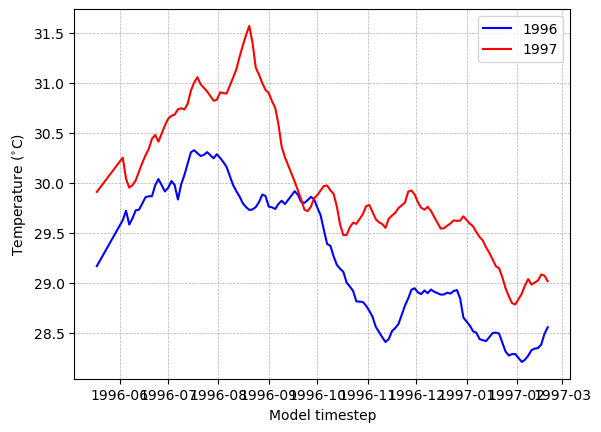

In [10]:
plt.plot(timestep_dates, theta_wind_values,'b-',label='1996')
plt.plot(timestep_dates, theta_no_wind_values,'r-',label='1997')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

## Results
1. Temperature Trends
1996 (blue):
- The temperature gradually increased from mid-1996, peaked around August–September (~30.3 °C), and then steadily declined toward early 1997, reaching lows around 28.4 °C.
- This pattern represents typical seasonal variability without significant anomalies, consistent with a neutral IOD year.

1997 (blue):
- The temperature rose more sharply than in 1996, peaking at a higher level of approximately 31.6 °C around September 1997.
- The decline in temperature post peak is less steep, and temperatures remain significantly higher than those in 1996 for most of the timeline.

2. Magnitude of Anomalies
- The positive temperature anomaly in 1997 compared to 1996 becomes especially pronounced from July to October, where the red line is consistently above the blue line by ~1 to 1.5 °C.
- This reflects the development of a strong positive Indian Ocean Dipole event in 1997, known historically for its intensity.

## Answering science question: How does the Indian Ocean Dipole affect the surrounding waters during positive and negative years?
The Indian Ocean Dipole (IOD) affects surrounding waters by altering sea surface temperatures across the Indian Ocean. During a positive IOD, the western Indian Ocean becomes warmer, bringing increased rainfall to East Africa, while the eastern Indian Ocean near Indonesia and Australia cools, often causing droughts. In contrast, a negative IOD warms the eastern Indian Ocean, leading to heavy rainfall in Indonesia and Australia, while the western side cools, reducing rainfall in East Africa. These changes in ocean temperatures directly influence regional weather patterns and monsoons.